# Regression
## Objectives
* Fit and evaluate a regression model for predicting property sale prices using our training and testing datasets.
## Inputs
* outputs\datasets\cleaned\TestSetCleaned.csv
* outputs\datasets\cleaned\TrainSetCleaned.csv
## Outputs
* TrainSet and TestSet
* Data cleaning and feature engineer pipeline 
* Modeling pipeline
* Feature importance analysis
---

# Import Packages

* Import packages using the 'import' statement followed by the name of the package. For example, 'import pandas' which is commonly used for data manipulation and analysis. This is  followed by and alias of your choice, preferably as pd although it is arbitrary.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Data
### Change working directory
We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\issam\\Housing-market-analysis.1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory.

    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
# New current directory set

Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\issam\\Housing-market-analysis.1'

## Transformations analysis
* Create engineered variables and develop feature engineering transformer

In [5]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer


# Load the cleaned dataset 
# # The dataset is already cleaned and ready for transformation 
train_data = pd.read_csv('outputs/datasets/cleaned/TrainSetCleaned.csv') # outputs\datasets\cleaned\TrainSetCleaned.csv'

test_data = pd.read_csv('outputs\datasets\cleaned\TestSetCleaned.csv') 

print('train data type')
print(type(train_data))

print('test dtype')
print(type(test_data))

# Separate the features and target variable in the training set 
X_train = train_data.drop('SalePrice', axis=1) 

y_train = train_data['SalePrice'] 

# Separate the features and target variable in the test set 
X_test = test_data.drop('SalePrice', axis=1) 


print(f"the test dataset {X_test.sum()}")

y_test = test_data['SalePrice'] 


# Define preprocessing steps for numerical and categorical variables 
numerical_features = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list() #exclude=['object', 'category']).columns.to_list()

# 1 - create two encoders for categorical variables
# Encoder for KitchenQual
# category_orders = ['Po','Fa','TA','Gd','Ex']

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
# kitchen_qual_encoder = OrdinalEncoder(categories=category_orders)
# categorical_features.remove('KitchenQual')

# Create encoder for other categorical variables
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 2 - fit_transform into X_train
# print(X_train['KitchenQual'].head(10))
# print(type(X_train))

# X_train['KitchenQualEncoded'] = kitchen_qual_encoder.fit_transform(X_train['KitchenQual'])
# print(X_train['KitchenQualEncoded', 'KitchenQual'].head(10))
encoder.fit(X_train[categorical_features])
# print(type(X_train))
X_train = pd.DataFrame(X_train)
X_train[categorical_features] = encoder.transform(X_train[categorical_features])

# print(X_train['KitchenQual'].head(10))
# 3 - transform into X_test 
X_test[categorical_features] = encoder.transform(X_test[categorical_features])

X_train = pd.DataFrame(X_train)
# print(type(X_train))
# print(X_train['categorical_variables'].head(10))
# print(X_train.head(10))

# All categorical features have been converted into numerical features

# Create required tranformations for numerical variables
def log10_transform(x):
    return np.log10(x)

def power_transform(x, power=1.5):
    return np.power(x, power)

log_transformer = FunctionTransformer(log10_transform, validate=True)
X_train[['GrLivArea']] = log_transformer.transform(X_train[['GrLivArea']])

power_transformer = FunctionTransformer(power_transform, kw_args={'power': 1.5}, validate=True)
X_train[['OverallQual']] = power_transformer.transform(X_train[['OverallQual']])

yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
# X_train['GarageArea'] = yeo_johnson.fit_transform(X_train['GarageArea'])

remainder_numerical_features = numerical_features.remove('GrLivArea')
remainder_numerical_features = numerical_features.remove('OverallQual')
remainder_numerical_features = numerical_features.remove('GarageArea')

print(X_train.sum())


# 1. Create a transformer
scaler = StandardScaler()

# 2. Fit-Transform into X_train
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# 3. Transform into X_test
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

df_numerical_features = X_train.copy()
df_numerical_features.head()

from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_numerical_features)
corr_sel.correlated_feature_sets_

corr_sel.features_to_drop_

train data type
<class 'pandas.core.frame.DataFrame'>
test dtype
<class 'pandas.core.frame.DataFrame'>
the test dataset 1stFlrSF                                                   338278
2ndFlrSF                                            104957.238616
BedroomAbvGr                                           833.714811
BsmtExposure    MnNoMnAvNoNoNoNoNoGdNoNoNoNoNoNoNoAvNoNoMnNoNo...
BsmtFinSF1                                                 125068
BsmtFinType1    GLQRecLwQGLQGLQUnfUnfUnfRecGLQBLQUnfALQLwQGLQA...
BsmtUnfSF                                                  168455
GarageArea                                                 139328
GarageFinish    FinNonUnfFinFinUnfNonRFnNonUnfUnfUnfRFnNonUnfU...
GarageYrBlt                                              577735.0
GrLivArea                                                  443618
KitchenQual     GdTAGdExExTATAGdTATATATAFaTAGdGdTATAGdGdTATAGd...
LotArea                                                   3006138
LotFrontage           

c:\Users\issam\Housing-market-analysis.1\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
c:\Users\issam\Housing-market-analysis.1\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


['1stFlrSF', 'BsmtFinSF1', 'GarageYrBlt', 'GrLivArea', 'YearRemodAdd']

## Step 2: ML Pipeline with all data
### ML pipeline for Data Cleaning and Feature Engineering

In [6]:


#############################################################################################

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from feature_engine.selection import SmartCorrelatedSelection


preprocessor = ColumnTransformer(
    transformers = [
        ('ord_enc', encoder, categorical_features),
        ('log_tf', log_transformer, ['GrLivArea']),
        ('pwr_tf', power_transformer, ['OverallQual']),
        ('yeo_johnson', yeo_johnson_transformer, ['GarageArea'])
        # ('passthrough', 'passthrough', [remainder_numerical_features])
    ], 
        remainder = 'passthrough'
)

def PipelineDataCleaningAndFeatureEngineering():
    # Converts Objects into Ints- I decided to do this in the preprocessor by encoding with ordinal encoder
    ''' 
    df['BsmtExposure'] = df['BsmtExposure'].astype('category').cat.codes
    df['BsmtFinType1'] = df['BsmtFinType1'].astype('category').cat.codes
    df['GarageFinish'] = df['GarageFinish'].astype('category').cat.codes
    df['KitchenQual'] = df['KitchenQual'].astype('category').cat.codes
    '''
    # Combine preprocessing with feature selection
    pipeline_base = Pipeline([
        ("preprocessor", preprocessor),
        ("scaler", StandardScaler()),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
                                                              method="pearson", threshold=0.6, selection_method="variance")),
        ("feature_selection", SelectFromModel(RandomForestRegressor()))
        ]
    )

    return pipeline_base

PipelineDataCleaningAndFeatureEngineering()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BsmtExposure',
                                                   'BsmtFinType1',
                                                   'GarageFinish',
                                                   'KitchenQual']),
                                                 ('log_tf',
                                                  FunctionTransformer(func=<function log10_transform at 0x00000246629A7E20>,
                                                                      validate=True),
                                                  ['GrLivArea']),
                                                 ('pwr_tf',
                                                  FunctionTransformer(func=<function power_transform at 0x00000246629A7C40>,
                                                                      kw_args={'power': 1.5},
                                                                      validate=True),
                                                  ['OverallQual']),
                                                 ('yeo_johnson',
                                                  PowerTransformer(),
                                                  ['GarageArea'])])),
                ('scaler', StandardScaler()),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(selection_method='variance',
                                          threshold=0.6)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor()))])

### ML Pipeline for Modelling and Hyperparameter Optimisation

In [7]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
# from xgboost import XGBRegressor


def PipelineReg(model):
    pipeline_base = Pipeline([
        ("preprocessor", preprocessor),
        ("scaler", StandardScaler()),
        ("smart_correlated_selection", SmartCorrelatedSelection(variables=None,
                                                              method="pearson", threshold=0.6, selection_method="variance")),
        ("feature_selection", SelectFromModel(model)),
        ("model", model)
    ])

    return pipeline_base

### Custom Class for Hyperparameter Optimisation

In [8]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")

            model = PipelineReg(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, )
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

### Reload X_train and X_test with ML suffix from original training dataframe to optimise pipeline

In [9]:

# Separate the features and target variable in the training set 
X_train_ML = train_data.drop('SalePrice', axis=1) 

y_train_ML = train_data['SalePrice'] 

# Separate the features and target variable in the test set 
X_test_ML = test_data.drop('SalePrice', axis=1) 


print(f"the test dataset {X_test.sum()}")

y_test_ML = test_data['SalePrice'] 

'''
print(X_train.sum())
print(X_test.sum())
print(X_test_original.sum())
print(X_train.shape, X_train.info(), y_train.shape, X_test.shape, X_test.info(), y_test.shape)
print(X_train.head(10))
print(X_test.head(10))
'''

the test dataset 1stFlrSF            -2.720186
2ndFlrSF             9.574897
BedroomAbvGr        -6.834774
BsmtExposure       676.000000
BsmtFinSF1         -11.353575
BsmtFinType1       964.000000
BsmtUnfSF            8.161670
GarageArea      139328.000000
GarageFinish       513.000000
GarageYrBlt          2.097545
GrLivArea       443618.000000
KitchenQual        684.000000
LotArea             -7.568766
LotFrontage        -10.497396
MasVnrArea          -4.793718
OpenPorchSF         37.334613
OverallCond        -11.349261
OverallQual       1775.000000
TotalBsmtSF        -19.300139
YearBuilt          -10.220250
YearRemodAdd        -6.722873
dtype: float64


'\nprint(X_train.sum())\nprint(X_test.sum())\nprint(X_test_original.sum())\nprint(X_train.shape, X_train.info(), y_train.shape, X_test.shape, X_test.info(), y_test.shape)\nprint(X_train.head(10))\nprint(X_test.head(10))\n'

In [10]:
pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()
pipeline_data_cleaning_feat_eng.fit(X_train_ML, y_train_ML)
X_train_transform = pipeline_data_cleaning_feat_eng.transform(X_train_ML) 
X_test_transform = pipeline_data_cleaning_feat_eng.transform(X_test_ML)
print(X_train_transform.shape, y_train_ML.shape, X_test_transform.shape, y_test_ML.shape)


(1160, 5) (1160,) (292, 5) (292,)


### Grid Search CV - Sklearn
#### Use standard hyperparameters to find most suitable algorithm

In [11]:
models_search = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=101),
    "RandomForestRegressor": RandomForestRegressor(random_state=101),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=101),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=101),# algorithm='SAMME'
}

params_search = {
    "DecisionTreeRegressor": {},
    "RandomForestRegressor": {},
    "ExtraTreesRegressor": {},
    "AdaBoostRegressor": {},
}


Quick GridSearch CV - Regressor

In [12]:
from sklearn.metrics import make_scorer, r2_score

search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train_ML, y_train_ML,
           scoring =  make_scorer(r2_score),
           n_jobs=-1, cv=3)


Running GridSearchCV for DecisionTreeRegressor 

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Check results

In [13]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score
2,ExtraTreesRegressor,0.706423,0.741996,0.766342,0.025718
1,RandomForestRegressor,0.648166,0.714223,0.768325,0.049777
3,AdaBoostRegressor,0.679768,0.712719,0.734524,0.023703
0,DecisionTreeRegressor,0.507257,0.54612,0.594873,0.036446


#### Do an extensive search on the most suitable algorithm to find the best hyperparameter configuration.
Define model and parameters, for Extensive Search

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

models_search = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=101),
}

# Documentation to help on hyperparameter list:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

# We will not conduct an extensive search, since the focus
# is on how to combine all knowledge in an applied project.
# In a workplace project, you may spend more time in this step
params_search = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100,150,200],
        'model__max_depth': [None, 10, 20,],
    }
}

Extensive GridSearch CV - Regressor

In [15]:
from sklearn.metrics import r2_score, make_scorer
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train_ML, y_train_ML, 
           scoring =  make_scorer(r2_score,),
           n_jobs=-1, cv=3)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


Check results

In [16]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__n_estimators
4,ExtraTreesRegressor,0.741405,0.763149,0.774085,0.015375,10,150
5,ExtraTreesRegressor,0.742048,0.761898,0.77435,0.014187,10,200
1,ExtraTreesRegressor,0.708231,0.742196,0.76487,0.024463,None,150
2,ExtraTreesRegressor,0.708552,0.74219,0.762761,0.023982,None,200
0,ExtraTreesRegressor,0.706423,0.741996,0.766342,0.025718,None,100
8,ExtraTreesRegressor,0.710017,0.740481,0.761451,0.022045,20,200
6,ExtraTreesRegressor,0.71029,0.739268,0.759395,0.021001,20,100
3,ExtraTreesRegressor,0.667201,0.725943,0.772568,0.043861,10,100
7,ExtraTreesRegressor,0.623668,0.6984,0.761595,0.056896,20,150


Get best model name programmatically

In [17]:
best_model = grid_search_summary.iloc[0,0]
best_model

'ExtraTreesRegressor'

Parameters for best model

In [18]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__max_depth': 10, 'model__n_estimators': 150}

Define the best reg pipeline

In [19]:
pipeline_reg = grid_search_pipelines[best_model].best_estimator_

def get_selected_features(list, features):
    # Removing 'x' and converting to integer
    indexes = [int(element[1:]) for element in list]
    return np.array(features)[indexes]


print(pipeline_reg['feature_selection'].get_support())
X_train_ML_transform = train_data.drop('SalePrice', axis=1)
pre_preprocessor_variables = X_train_ML_transform.columns.tolist()
print(f"pre_preprocessor_variables:{pre_preprocessor_variables}")
X_train_ML_selection = pipeline_reg["preprocessor"].transform(X_train_ML_transform)
print(f"post_preprocessor_variables:{pd.DataFrame(X_train_ML_selection).columns.tolist()}")
X_train_ML_selection = pipeline_reg["scaler"].transform(pd.DataFrame(X_train_ML_selection))
print(f"post_scaler_variables:{pd.DataFrame(X_train_ML_selection).columns.tolist()}")
X_train_ML_selection = pipeline_reg["smart_correlated_selection"].transform(X_train_ML_selection)
post_smart_corr_variables = pd.DataFrame(X_train_ML_selection).columns.tolist()
post_smart_corr_variables_names = get_selected_features(post_smart_corr_variables, pre_preprocessor_variables)
print(f"post_smart_corr_variables_names:{post_smart_corr_variables_names}")   
print(f"post_smart_corr_variables:{pd.DataFrame(X_train_ML_selection).columns.tolist()}")    
        
smart_corr_sel = X_train_ML_selection.columns.tolist()
final_selected_features = np.array(smart_corr_sel)[pipeline_reg['feature_selection'].get_support()]
final_selected_features_names = get_selected_features(final_selected_features, pre_preprocessor_variables)
print(f"final_selected_features:{final_selected_features}")
print(f"final_selected_features_names:{final_selected_features_names}")
# print(pipeline_reg[SmartCorrelatedSelection].features_to_keep_.columns[pipeline_reg['feature_selection'].get_support()].tolist())
pipeline_reg

[False False False  True  True  True  True False False False False False
 False False False  True]
pre_preprocessor_variables:['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
post_preprocessor_variables:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
post_scaler_variables:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
post_smart_corr_variables_names:['1stFlrSF' '2ndFlrSF' 'BedroomAbvGr' 'BsmtExposure' 'BsmtFinSF1'
 'BsmtUnfSF' 'GarageArea' 'GarageYrBlt' 'GrLivArea' 'KitchenQual'
 'LotFrontage' 'MasVnrArea' 'OpenPorchSF' 'OverallCond' 'OverallQual'
 'YearBuilt']
post_smart_corr_variables:['x0', 'x1', 'x2', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x11', 'x13', 'x14', 'x15', 'x16', 'x17', 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BsmtExposure',
                                                   'BsmtFinType1',
                                                   'GarageFinish',
                                                   'KitchenQual']),
                                                 ('log_tf',
                                                  FunctionTransformer(func=<function log10_transform at 0x00000246629A7E20>,
                                                                      validate=True),
                                                  ['GrLivArea']),
                                                 ('pwr_tf',...
                                                  ['OverallQual']),
                                                 ('yeo_johnson',
                                                  PowerTransformer(),
                                                  ['GarageArea'])])),
                ('scaler', StandardScaler()),
                ('smart_correlated_selection',
                 SmartCorrelatedSelection(selection_method='variance',
                                          threshold=0.6)),
                ('feature_selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=101))),
                ('model',
                 ExtraTreesRegressor(max_depth=10, n_estimators=150,
                                     random_state=101))])

### Assess feature importance

In [20]:
import pandas as pd

# Convert X_train_ML to a pandas DataFrame
X_train_df = pd.DataFrame(X_train_ML)

# Now use the .tail() method
X_train_df.tail()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd
1155,1310,1140.0,3.000000,Mn,781,GLQ,503,1069,Fin,1998.0,...,Gd,16545,70.243187,731.0,126,5,8,1284,1998,1998
1156,526,462.0,2.000000,Gd,462,GLQ,0,297,Unf,1973.0,...,TA,1596,21.000000,0.0,101,5,4,462,1973,1973
1157,716,840.0,3.000000,No,81,Non,23,452,Fin,1980.0,...,TA,1950,24.000000,0.0,0,6,6,716,1980,1980
1158,1530,0.0,2.873045,Av,1274,ALQ,256,430,Fin,2005.0,...,Gd,16158,124.000000,16.0,36,5,7,1530,2005,2005
1159,1148,0.0,3.000000,No,1148,BLQ,0,672,Unf,1959.0,...,TA,7931,70.000000,0.0,0,5,5,1148,1959,1959


* With the current model, we can assess with .features_importances_

(1160, 21)
(1160, 21)
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BsmtExposure',
                                                   'BsmtFinType1',
                                                   'GarageFinish',
                                                   'KitchenQual']),
                                                 ('log_tf',
                                                  FunctionTransformer(func=<function log10_transform at 0x00000246629A7E20>,
                                                                      validate=True),
                                                  ['GrLivArea']),
                                 

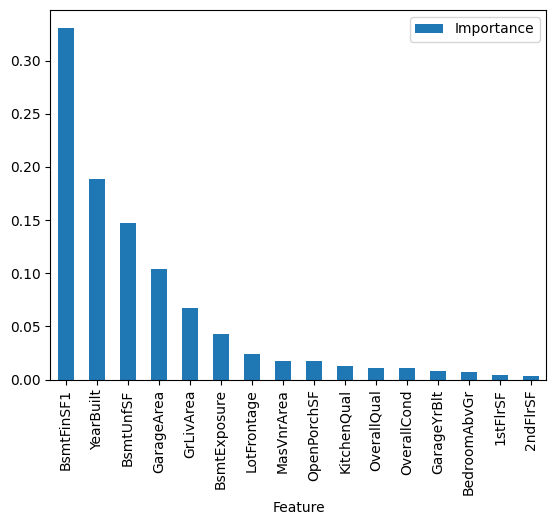

In [21]:
import pandas as pd

# Assuming X_train_ML is your NumPy array ()
#X_train_df = pd.DataFrame(X_train_original)
print(X_train_ML.shape)
print(X_train_df.shape)

# Now you can access the columns attribute 
columns = get_selected_features(post_smart_corr_variables, pre_preprocessor_variables)
print(pipeline_reg)
print(' next  ')
print(columns)

# Access feature importances from the feature selection step
feat_selector = pipeline_data_cleaning_feat_eng.named_steps['feature_selection'].estimator_
feat_selector_importances = feat_selector.feature_importances_

print("feat selector:",feat_selector)
print("Feature importances from SelectFromModel step:", feat_selector_importances)


# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    # 'Feature': columns[pipeline_reg['feat_selection'].get_support()],
    'Feature': columns,
    # 'Importance': pipeline_reg['model'].feature_importances_
    'Importance':feat_selector_importances})
    .sort_values(by='Importance', ascending=False))
                                    

# re-assign best_features order
best_features = df_feature_importance['Feature'].to_list()
print(df_feature_importance['Feature'].tolist())

# Most important features statement and plot
print(f"* These are the {len(best_features)} features in descending order. "
      f"\n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

### Evaluate Pipeline on Train and Test Sets

In [22]:
from sklearn.metrics import mean_squared_error, r2_score


def reg_performance(X_train_ML, y_train_ML, X_test_ML, y_test_ML, pipeline):
    print("#### Train Set #### \n")
    y_train_pred = pipeline.predict(X_train_ML)
    print("Mean Squared Error (Train):", mean_squared_error(y_train_ML, y_train_pred))
    print("R2 Score (Train):", r2_score(y_train_ML, y_train_pred))

    print("\n#### Test Set ####\n")
    y_test_pred = pipeline.predict(X_test_ML)
    print("Mean Squared Error (Test):", mean_squared_error(y_test_ML, y_test_pred))
    print("R2 Score (Test):", r2_score(y_test_ML, y_test_pred))

    # Plot Actual vs. Predicted for training data
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_train_ML, y_train_pred, alpha=0.5)
    plt.plot([y_train_ML.min(), y_train_ML.max()], [y_train_ML.min(), y_train_ML.max()], '--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted (Training)')
    
    # Plot Actual vs. Predicted for test data
    plt.subplot(1, 2, 2)
    plt.scatter(y_test_ML, y_test_pred, alpha=0.5)
    plt.plot([y_test_ML.min(), y_test_ML.max()], [y_test_ML.min(), y_test_ML.max()], '--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted (Test)')
    
    plt.tight_layout()
    plt.show()

    # from sklearn.pipeline import Pipeline


---


In [23]:
import warnings

# Suppress undefined metric warnings
warnings.filterwarnings("ignore", category=UserWarning)


Evaluation: We cross check with metrics defined at ML business case


   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2158       0.0      4.000000           Av         477          ALQ   
1      1614       0.0      3.000000           Av          20          GLQ   
2       810     672.0      2.873045           No         156          BLQ   
3       894       0.0      3.000000           No         492          BLQ   
4       864       0.0      3.000000           No           0          Unf   
5      1026     981.0      3.000000           Av         765          GLQ   
6      1412       0.0      3.000000           Mn        1005          GLQ   
7       970     739.0      2.873045           No           0          Unf   
8       894       0.0      2.000000           No           0          Unf   
9      1085     649.0      3.000000           No         600          Rec   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  KitchenQual LotArea  \
0        725         576          Unf       1950.0  ...           Gd   1

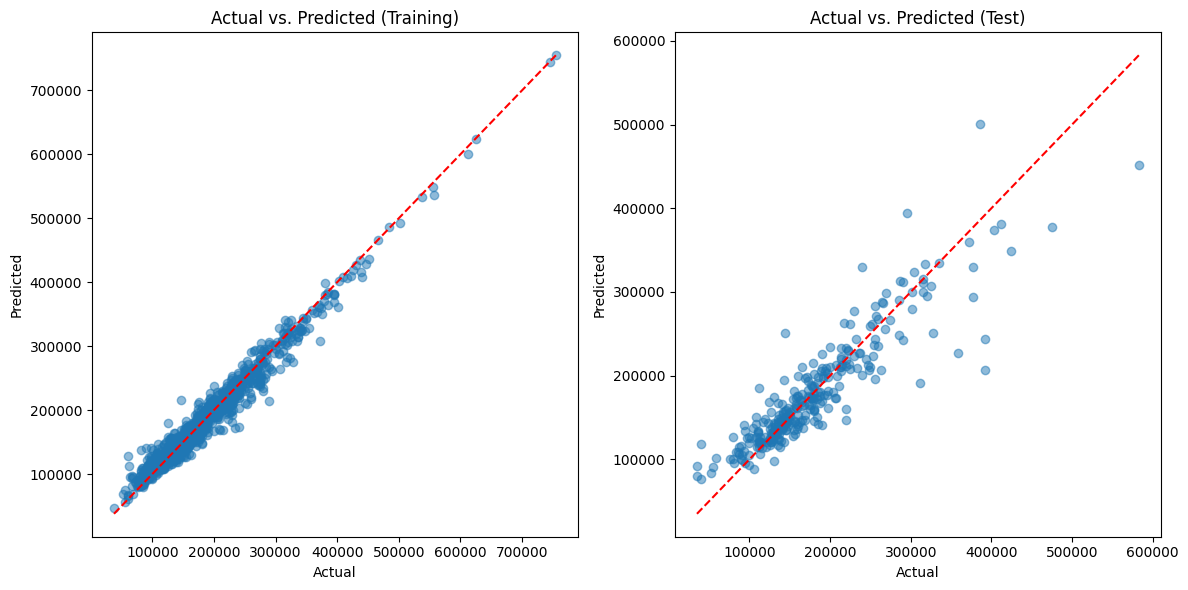

0       243000
1       221500
2       140000
3       129000
4       116050
         ...  
1155    340000
1156     91000
1157    151000
1158    260000
1159    132500
Name: SalePrice, Length: 1160, dtype: int64


In [24]:
print(X_train_ML.head(10))
print(pd.DataFrame(X_train_transform).head(10))
print(X_test_ML.head(10))
print(pd.DataFrame(X_test_transform).head(10))

pipeline_reg.fit(X_train_ML, y_train_ML)

reg_performance(X_train_ML=X_train_ML, y_train_ML=y_train_ML,
                 X_test_ML=X_test_ML, y_test_ML=y_test_ML,
                 pipeline=pipeline_reg,
                )

print(y_train_ML)

## Step 3: Refit pipeline with best features
### Refit ML Pipeline and Resampling
In theory, a pipeline fitted **using only the most important features** should give the same result as the one fitted with **all variables and feature selection**.

### Rewrite ML pipeline for Data Cleaning and Feature Engineering

In [25]:
best_features

['BsmtFinSF1',
 'YearBuilt',
 'BsmtUnfSF',
 'GarageArea',
 'GrLivArea',
 'BsmtExposure',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'KitchenQual',
 'OverallQual',
 'OverallCond',
 'GarageYrBlt',
 'BedroomAbvGr',
 '1stFlrSF',
 '2ndFlrSF']

New Pipeline for DataCleaning And FeatureEngineering

In [26]:
from feature_engine.encoding import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features_best_features = categorical_features
categorical_features_best_features.remove('GarageFinish')
categorical_features_best_features.remove('BsmtFinType1')
print(categorical_features_best_features, categorical_features)

preprocessor_best_features = ColumnTransformer(
    transformers = [
        ('ord_enc', encoder, categorical_features_best_features),
        ('log_tf', log_transformer, ['GrLivArea']),
        # I decided to eliminate these transformations following over fitting analysis 
        # ('pwr_tf', power_transformer, ['OverallQual']),
        # ('yeo_johnson', yeo_johnson_transformer, ['GarageArea'])
        # ('passthrough', 'passthrough', [remainder_numerical_features])
    ], 
        remainder = 'passthrough'
)

def PipelineDataCleaningAndFeatureEngineering():
    pipeline_base = Pipeline([
    
        ("preprocessor", preprocessor_best_features),
        # Scale numerical features
        ("scaler", StandardScaler()),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
                                                              method="pearson", threshold=0.6, selection_method="variance")),
        ("feature_selection", SelectFromModel(ExtraTreesRegressor()))
    ]
)

    return pipeline_base



['BsmtExposure', 'KitchenQual'] ['BsmtExposure', 'KitchenQual']


### Rewrite ML Pipeline for Modelling
Function for Pipeline optmisation

In [27]:
# Pipeline Optimization: Model
def PipelineReg(model):
    pipeline_base = Pipeline([
        ("preprocessor", preprocessor_best_features),
        ("scaler", StandardScaler()),
        ("smart_correlated_selection", SmartCorrelatedSelection(variables=None,
                                                              method="pearson", threshold=0.6, selection_method="variance")),
        ("feature_selection", SelectFromModel(model)),
        ("model", model)
    ]
)

    return pipeline_base
pipeline_reg_best_features = PipelineReg('ExtraTreesRegressor')

### Set up Train Test Set, considering only with best features

In [28]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable in the training set 
X_train = train_data.drop('SalePrice', axis=1)[best_features] 

y_train = train_data['SalePrice'] 

# Separate the features and target variable in the test set 
X_test = test_data.drop('SalePrice', axis=1)[best_features]


print(f"the test dataset {X_test.sum()}")

y_test = test_data['SalePrice'] 


the test dataset BsmtFinSF1                                                 125068
YearBuilt                                                  575324
BsmtUnfSF                                                  168455
GarageArea                                                 139328
GrLivArea                                                  443618
BsmtExposure    MnNoMnAvNoNoNoNoNoGdNoNoNoNoNoNoNoAvNoNoMnNoNo...
LotFrontage                                          20278.943396
MasVnrArea                                                29582.0
OpenPorchSF                                                 15441
KitchenQual     GdTAGdExExTATAGdTATATATAFaTAGdGdTATAGdGdTATAGd...
OverallQual                                                  1775
OverallCond                                                  1619
GarageYrBlt                                              577735.0
BedroomAbvGr                                           833.714811
1stFlrSF                                                   

### Grid Search CV: Sklearn
Using the most suitable model from the last section and its best hyperparameter configuration.

We are using the same model from the last GridCV search

In [29]:
models_search  

{'ExtraTreesRegressor': ExtraTreesRegressor(random_state=101)}

And the best parameters from the last GridCV search

In [30]:
best_parameters

{'model__max_depth': 10, 'model__n_estimators': 150}

You will need to type in manually since the hyperparameter values have to be a list. The previous dictionary is not in this format.

In [31]:
params_search = {
    'ExtraTreesRegressor': {
        'model__n_estimators': [100],
        'model__max_depth': [None],
    }
}

GridSearch CV

In [32]:
import pandas as pd 
from sklearn.metrics import make_scorer, r2_score

quick_search = HyperparameterOptimizationSearch(
    models=models_search, params=params_search)
quick_search.fit(X_train, y_train,
                 scoring=make_scorer(r2_score, ),
                 n_jobs=-1, cv=3)

print(X_train.shape)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


(1160, 16)


Check results

In [33]:
grid_search_summary, grid_search_pipelines = quick_search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__n_estimators
0,ExtraTreesRegressor,0.616075,0.697627,0.768262,0.062607,None,100


Define the best reg pipeline

In [34]:
best_model = grid_search_summary.iloc[0, 0]
pipeline_reg_best_features = grid_search_pipelines[best_model].best_estimator_
pipeline_reg_best_features

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BsmtExposure',
                                                   'KitchenQual']),
                                                 ('log_tf',
                                                  FunctionTransformer(func=<function log10_transform at 0x00000246629A7E20>,
                                                                      validate=True),
                                                  ['GrLivArea'])])),
                ('scaler', StandardScaler()),
                ('smart_correlated_selection',
                 SmartCorrelatedSelection(selection_method='variance',
                                          threshold=0.6)),
                ('feature_selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=101))),
                ('model', ExtraTreesRegressor(random_state=101))])

### Assess feature importance

In [35]:
print("best_features:", best_features)
print("feature_importances:", pipeline_reg_best_features['model'].feature_importances_)
print("Length of best_features:", len(best_features))
print("Length of feature_importances:", len(pipeline_reg_best_features['model'].feature_importances_))

best_features: ['BsmtFinSF1', 'YearBuilt', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'BsmtExposure', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'KitchenQual', 'OverallQual', 'OverallCond', 'GarageYrBlt', 'BedroomAbvGr', '1stFlrSF', '2ndFlrSF']
feature_importances: [0.14741951 0.13049035 0.14132676 0.41577101 0.16499237]
Length of best_features: 16
Length of feature_importances: 5


['BsmtFinSF1', 'YearBuilt', 'BsmtUnfSF', 'GarageArea', 'GrLivArea']
[0.14741951 0.13049035 0.14132676 0.41577101 0.16499237]
* These are the 16 most important features in descending order. The model was trained on them: 
['GarageArea', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'YearBuilt']


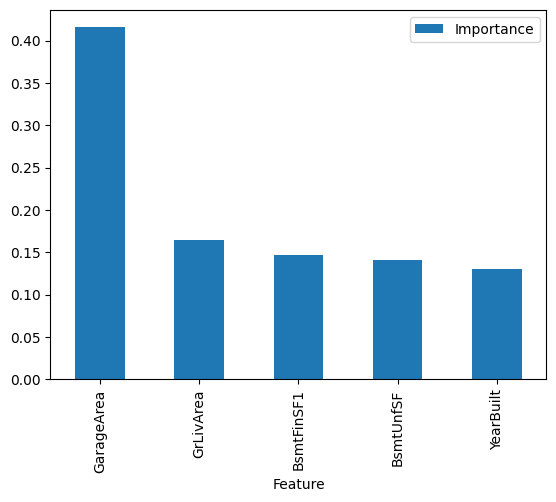

In [36]:
# create DataFrame to display feature importance
columns = best_features[:5]
print(columns)
print(pipeline_reg_best_features['model'].feature_importances_)
df_feature_importance = (pd.DataFrame(data={
    'Feature': columns,
    'Importance': pipeline_reg_best_features['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)


# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

### Evaluate Pipeline on Train and Test Sets
Evaluation: We cross-check with metrics defined in the ML business case.


#### Train Set #### 

Mean Squared Error (Train): 1124403.2147988507
R2 Score (Train): 0.9998233176442407

#### Test Set ####

Mean Squared Error (Test): 1399506137.288016
R2 Score (Test): 0.7649105186598144


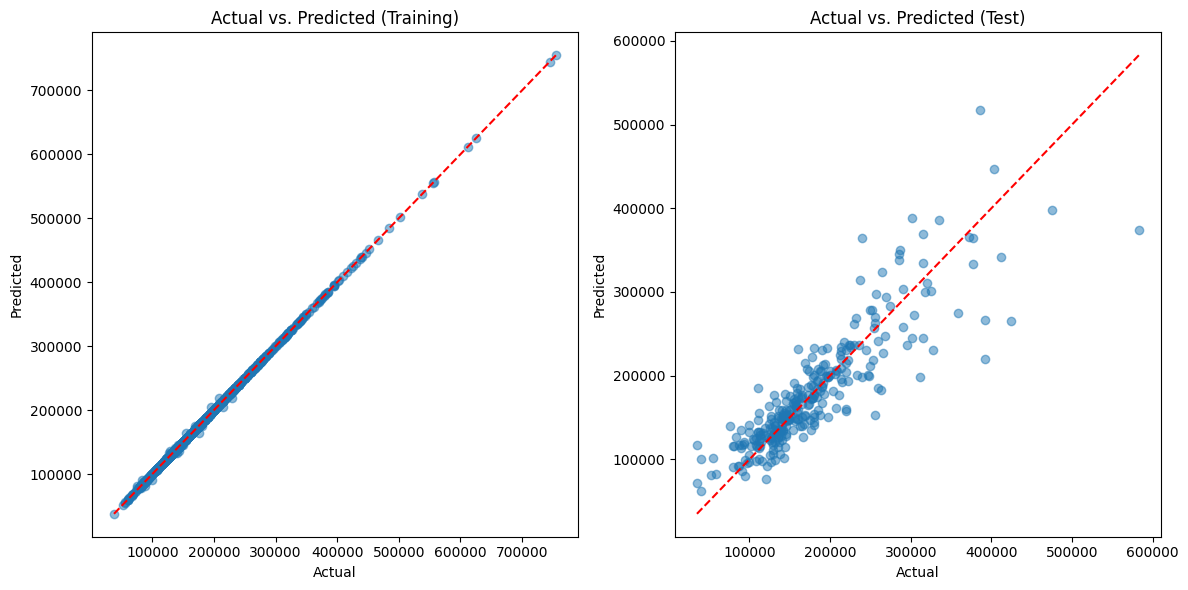

In [37]:
reg_performance(X_train_ML=X_train, y_train_ML=y_train,
                X_test_ML=X_test, y_test_ML=y_test,
                pipeline=pipeline_reg_best_features,
                )

## Overfitting assessment 

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
 

##########################################################################

pipeline_reg_best_features = grid_search_pipelines[best_model].best_estimator_
print(pipeline_reg_best_features['feature_selection'].get_support())
X_train_ML_transform = train_data.drop('SalePrice', axis=1)[best_features]
X_test_ML_transform = test_data.drop('SalePrice', axis=1)[best_features]
print(f"pre_preprocessor_variables:{X_train_ML_transform.columns.tolist()}")
X_train_ML_selection = pipeline_reg_best_features["preprocessor"].transform(X_train_ML_transform)
X_test_ML_selection = pipeline_reg_best_features["preprocessor"].transform(X_test_ML_transform)
print(f"post_preprocessor_variables:{pd.DataFrame(X_train_ML_selection).columns.tolist()}")
X_train_ML_selection = pipeline_reg_best_features["scaler"].transform(pd.DataFrame(X_train_ML_selection))
X_test_ML_selection = pipeline_reg_best_features["scaler"].transform(pd.DataFrame(X_test_ML_selection))
print(f"post_scaler_variables:{pd.DataFrame(X_train_ML_selection).columns.tolist()}")
X_train_ML_selection = pipeline_reg_best_features["smart_correlated_selection"].transform(X_train_ML_selection)
X_test_ML_selection = pipeline_reg_best_features["smart_correlated_selection"].transform(X_test_ML_selection)
post_smart_corr_variables = pd.DataFrame(X_train_ML_selection).columns.tolist()
print(f"post_smart_corr_variables:{pd.DataFrame(X_train_ML_selection).columns.tolist()}")    

X_train_ML_selection = pipeline_reg_best_features["feature_selection"].transform(X_train_ML_selection)
X_test_ML_selection = pipeline_reg_best_features["feature_selection"].transform(X_test_ML_selection)

post_feature_selection_variables = pd.DataFrame(X_train_ML_selection).columns.tolist()
print(f"post_feature_selection_variables:{post_feature_selection_variables}") 
final_selected_features = np.array(post_smart_corr_variables)[pipeline_reg_best_features['feature_selection'].get_support()]
print(f"final_selected_features:{final_selected_features}")
print(f"final_selected_features_names:{get_selected_features(final_selected_features, best_features)}")
# print(pipeline_reg[SmartCorrelatedSelection].features_to_keep_.columns[pipeline_reg['feature_selection'].get_support()].tolist())
pipeline_reg_best_features
##############################################################################################

# Perform cross-validation
# Define the model
model = Ridge(alpha=1.0)
 
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model,X_train_ML_selection, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R² Score: {np.mean(cv_scores)}')

# Fit the model on the entire training set
model.fit(X_train_ML_selection, y_train)
 
# Evaluate the model on the test set
test_score = model.score(X_test_ML_selection, y_test)
print(f'Test R² Score: {test_score}')

[False  True False  True False  True False False False  True False False
  True]
pre_preprocessor_variables:['BsmtFinSF1', 'YearBuilt', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'BsmtExposure', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'KitchenQual', 'OverallQual', 'OverallCond', 'GarageYrBlt', 'BedroomAbvGr', '1stFlrSF', '2ndFlrSF']
post_preprocessor_variables:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
post_scaler_variables:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
post_smart_corr_variables:['x0', 'x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x13', 'x14']
post_feature_selection_variables:[0, 1, 2, 3, 4]
final_selected_features:['x1' 'x4' 'x6' 'x10' 'x14']
final_selected_features_names:['YearBuilt' 'GrLivArea' 'LotFrontage' 'OverallQual' '1stFlrSF']
Cross-Validation R² Scores: [0.7055243  0.76080076 0.73501849 0.74946782 0.77841607]
Mean Cross-Validation R² Score: 0.7458454896161035
Test R² Score: 0.6607455398549857


## Conclusions on over fitting review
our Ridge analysis suggests some over fitting but not extreme. given more time I would consider simplifying the model to decrease over fitting.

# Step 4: Push files to Repo
We will generate the following files

* Train set
* Test set
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* features importance plot

In [39]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/predict_saleprice/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'outputs/ml_pipeline/predict_saleprice/v1'


## Train Set

In [40]:
print(X_train.shape)

(1160, 16)


Convert X_train back into a dataframe and save.

In [41]:
import pandas as pd

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Save the DataFrame to a CSV file
X_train_df.to_csv(f"{file_path}/X_train.csv", index=False)

In [42]:
y_train

0       243000
1       221500
2       140000
3       129000
4       116050
         ...  
1155    340000
1156     91000
1157    151000
1158    260000
1159    132500
Name: SalePrice, Length: 1160, dtype: int64

In [43]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)

## Test Set
* note that the variables are transformed already in X_test

In [44]:
import pandas as pd

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)

# Now you can use DataFrame methods like head()
X_test_df.head()

,BsmtFinSF1,YearBuilt,BsmtUnfSF,GarageArea,GrLivArea,BsmtExposure,LotFrontage,MasVnrArea,OpenPorchSF,KitchenQual,OverallQual,OverallCond,GarageYrBlt,BedroomAbvGr,1stFlrSF,2ndFlrSF
0,932,2002,133,586,1989,Mn,90.000000,210.0,60,Gd,8,5,2002.0,3.0,1091,898.0
1,399,1940,484,240,1505,No,70.243187,0.0,0,TA,5,5,1940.0,3.0,988,517.0
2,532,1977,364,484,1040,Mn,61.000000,0.0,0,Gd,5,7,1977.0,3.0,1040,0.0
3,1016,2003,556,726,2668,Av,110.000000,664.0,0,Ex,9,5,2003.0,3.0,1572,1096.0
4,1436,2009,570,900,2020,No,94.000000,305.0,54,Ex,10,5,2009.0,3.0,2020,0.0


In [45]:
print(X_test_df.shape)
X_test_df.head()

(292, 16)


,BsmtFinSF1,YearBuilt,BsmtUnfSF,GarageArea,GrLivArea,BsmtExposure,LotFrontage,MasVnrArea,OpenPorchSF,KitchenQual,OverallQual,OverallCond,GarageYrBlt,BedroomAbvGr,1stFlrSF,2ndFlrSF
0,932,2002,133,586,1989,Mn,90.000000,210.0,60,Gd,8,5,2002.0,3.0,1091,898.0
1,399,1940,484,240,1505,No,70.243187,0.0,0,TA,5,5,1940.0,3.0,988,517.0
2,532,1977,364,484,1040,Mn,61.000000,0.0,0,Gd,5,7,1977.0,3.0,1040,0.0
3,1016,2003,556,726,2668,Av,110.000000,664.0,0,Ex,9,5,2003.0,3.0,1572,1096.0
4,1436,2009,570,900,2020,No,94.000000,305.0,54,Ex,10,5,2009.0,3.0,2020,0.0


In [46]:
X_test_df.to_csv(f"{file_path}/X_test.csv", index=False)

In [47]:
y_test.head()

0    255000
1    145000
2    150500
3    412500
4    402861
Name: SalePrice, dtype: int64

In [48]:
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

## ML Pipelines: Data Cleaning and Feat Eng pipeline and Modelling Pipeline
We will save 2 pipelines:

* Both should be used in conjunction to predict Live Data.
* To predict on Train Set, Test Set we use only pipeline_reg, since the data is already processed.
Pipeline responsible for Data Cleaning and Feature Engineering.

In [49]:
pipeline_data_cleaning_feat_eng

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BsmtExposure',
                                                   'KitchenQual']),
                                                 ('log_tf',
                                                  FunctionTransformer(func=<function log10_transform at 0x00000246629A7E20>,
                                                                      validate=True),
                                                  ['GrLivArea']),
                                                 ('pwr_tf',
                                                  FunctionTransformer(func=<function power_transform at 0x00000246629A7C40>,
                                                                      kw_args={'power': 1.5},
                                                                      validate=True),
                                                  ['OverallQual']),
                                                 ('yeo_johnson',
                                                  PowerTransformer(),
                                                  ['GarageArea'])])),
                ('scaler', StandardScaler()),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(selection_method='variance',
                                          threshold=0.6)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor()))])

In [50]:
joblib.dump(value=pipeline_data_cleaning_feat_eng ,
            filename=f"{file_path}/pipeline_dcfe.pkl")
joblib.dump(value=pipeline_reg_best_features ,
            filename=f"{file_path}/pipeline_regression.pkl")



['outputs/ml_pipeline/predict_saleprice/v1/pipeline_regression.pkl']

### Feature Importance plot

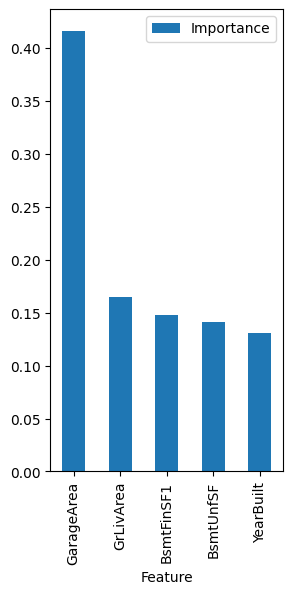

In [51]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance', figsize=(3, 6))
plt.show()

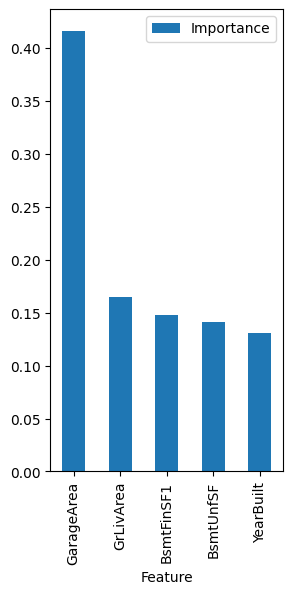

In [52]:
df_feature_importance.plot(kind='bar', x='Feature', y='Importance', figsize=(3,6))
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')